C:\Users\Elite\AppData\Local\Temp\ipykernel_25668\1604124308.py:59: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(PLOTS_DIR, "scheduled_exchanges_vs_price_scatter.png"), dpi=300, bbox_inches="tight")
c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


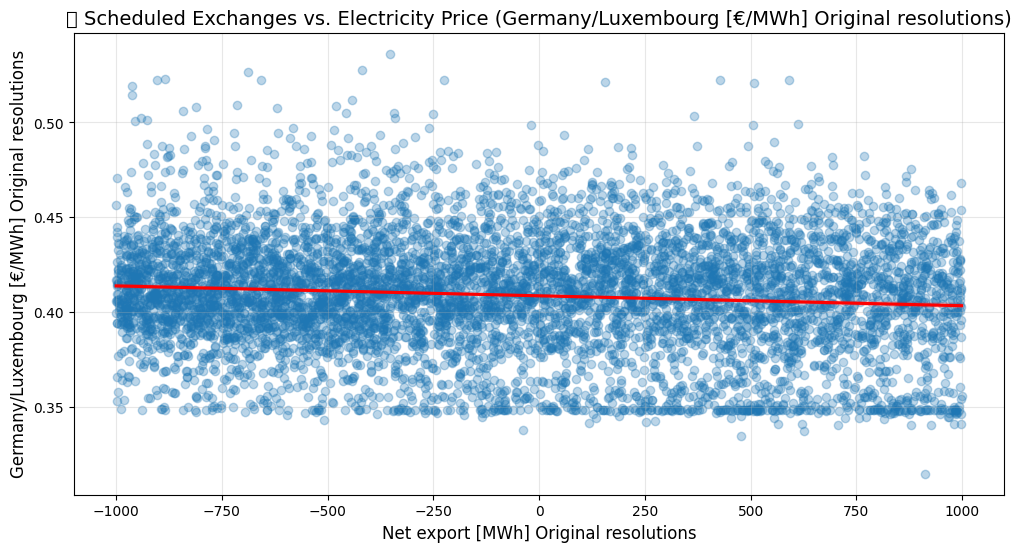

C:\Users\Elite\AppData\Local\Temp\ipykernel_25668\1604124308.py:79: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(PLOTS_DIR, "scheduled_exchanges_vs_price_trend.png"), dpi=300, bbox_inches="tight")
C:\Users\Elite\AppData\Local\Temp\ipykernel_25668\1604124308.py:79: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(PLOTS_DIR, "scheduled_exchanges_vs_price_trend.png"), dpi=300, bbox_inches="tight")
c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserW

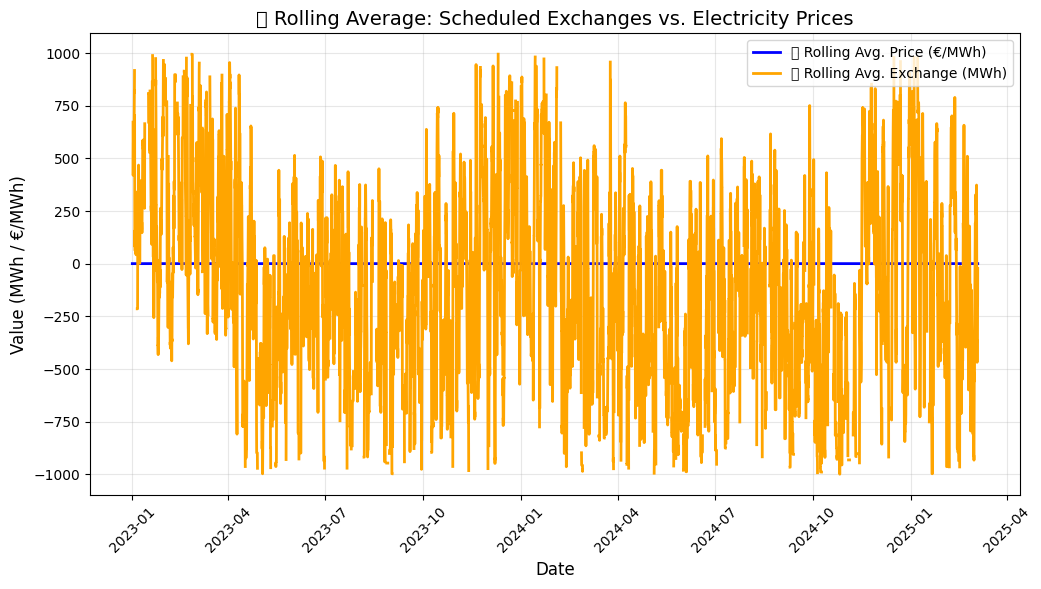

✅ All plots saved in '../visualizations' directory.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================
# 📌 Define Paths
# =========================
PLOTS_DIR = "../visualizations"
os.makedirs(PLOTS_DIR, exist_ok=True)

# =========================
# 📌 Load Datasets
# =========================
exchange_file = "../data/transformed/transformed_refined_Scheduled_commercial_exchanges_202301010000_202503050000_Quarterhour.csv"
price_file = "../data/transformed/transformed_refined_Day-ahead_prices_202301010000_202503050000_Hour.csv"

df_exchange = pd.read_csv(exchange_file, delimiter=",", low_memory=False)
df_price = pd.read_csv(price_file, delimiter=",", low_memory=False)

# =========================
# 📌 Convert Time Column
# =========================
df_exchange["Start date"] = pd.to_datetime(df_exchange["Start date"], errors="coerce")
df_price["Start date"] = pd.to_datetime(df_price["Start date"], errors="coerce")

# =========================
# 📌 Merge Datasets
# =========================
df_merged = df_price.merge(df_exchange, on="Start date", how="inner")

# Identify price and exchange columns
price_columns = [col for col in df_price.columns if "€/MWh" in col]
exchange_columns = [col for col in df_exchange.columns if "[MWh]" in col]

# Convert columns to numeric
df_merged[price_columns] = df_merged[price_columns].apply(pd.to_numeric, errors="coerce")
df_merged[exchange_columns] = df_merged[exchange_columns].apply(pd.to_numeric, errors="coerce")

# Drop rows with NaN values for meaningful plots
df_merged.dropna(subset=price_columns + exchange_columns, how="all", inplace=True)

# =========================
# 📌 Select Key Variables
# =========================
country_price = price_columns[0]  # Modify if needed
exchange_flow = exchange_columns[0]

# =========================
# 📌 1️⃣ Scatter Plot with Regression Line
# =========================
plt.figure(figsize=(12, 6))
sns.regplot(x=df_merged[exchange_flow], y=df_merged[country_price], 
            scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
plt.xlabel(exchange_flow, fontsize=12)
plt.ylabel(country_price, fontsize=12)
plt.title(f"🔹 Scheduled Exchanges vs. Electricity Price ({country_price})", fontsize=14)
plt.grid(alpha=0.3)
plt.savefig(os.path.join(PLOTS_DIR, "scheduled_exchanges_vs_price_scatter.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# =========================
# 📌 2️⃣ Rolling Average Trends (Time Series)
# =========================
df_merged["Rolling_Price"] = df_merged[country_price].rolling(window=24, min_periods=1).mean()
df_merged["Rolling_Exchange"] = df_merged[exchange_flow].rolling(window=24, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_merged["Start date"], df_merged["Rolling_Price"], label="🔹 Rolling Avg. Price (€/MWh)", color="blue", linewidth=2)
plt.plot(df_merged["Start date"], df_merged["Rolling_Exchange"], label="🔸 Rolling Avg. Exchange (MWh)", color="orange", linewidth=2)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Value (MWh / €/MWh)", fontsize=12)
plt.title("🔹 Rolling Average: Scheduled Exchanges vs. Electricity Prices", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.savefig(os.path.join(PLOTS_DIR, "scheduled_exchanges_vs_price_trend.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("✅ All plots saved in '../visualizations' directory.")
